## Search news with keywords'midterm election' within 31 days


In [1]:
### The following codes run in Python 2.7

from newsapi import NewsApiClient
import pandas as pd
from datetime import datetime, timedelta

In [2]:
api = NewsApiClient(api_key='3b0e11ac3a4c485ca7495ea9036ff35a')# Here input the api, it can be obtained from https://newsapi.org/

In [3]:
def daterange(start_date, end_date):
    delta = timedelta(days=1)
    while start_date < end_date:
        yield start_date
        start_date += delta
date_start=pd.to_datetime('2018-09-28')  # start date of search 
date_end=pd.to_datetime('2018-10-29')    # end date of search 
datetime_ls=list(daterange(date_start,date_end))
date_ls=[str(j)[0:10] for j in datetime_ls]
date_ls

['2018-09-28',
 '2018-09-29',
 '2018-09-30',
 '2018-10-01',
 '2018-10-02',
 '2018-10-03',
 '2018-10-04',
 '2018-10-05',
 '2018-10-06',
 '2018-10-07',
 '2018-10-08',
 '2018-10-09',
 '2018-10-10',
 '2018-10-11',
 '2018-10-12',
 '2018-10-13',
 '2018-10-14',
 '2018-10-15',
 '2018-10-16',
 '2018-10-17',
 '2018-10-18',
 '2018-10-19',
 '2018-10-20',
 '2018-10-21',
 '2018-10-22',
 '2018-10-23',
 '2018-10-24',
 '2018-10-25',
 '2018-10-26',
 '2018-10-27',
 '2018-10-28']

In [4]:
len(date_ls)

31

In [5]:
news_ls=[]
for date_str in date_ls:
    news_midterm=api.get_everything(q='midterm election',from_param = date_str,to = date_str)
    article_dic=news_midterm['articles']
    df_day=pd.DataFrame(article_dic)
    news_ls.append(df_day)

In [6]:
 df=pd.concat(news_ls)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 19
Data columns (total 8 columns):
author         507 non-null object
content        612 non-null object
description    619 non-null object
publishedAt    620 non-null object
source         620 non-null object
title          620 non-null object
url            620 non-null object
urlToImage     610 non-null object
dtypes: object(8)
memory usage: 43.6+ KB


In [9]:
df.head(5)

,author,content,description,publishedAt,source,title,url,urlToImage
0,Kris Holt,The November hearing will cover issues includi...,Google CEO Sundar Pichai will testify before t...,2018-09-28T18:57:00Z,"{'id': 'engadget', 'name': 'Engadget'}",Google’s CEO will testify before Congress abou...,https://www.engadget.com/2018/09/28/google-ceo...,https://o.aolcdn.com/images/dims?thumbnail=120...
1,EMILY YELLIN,I have heard that for every person who talks a...,"On Thursday, Christine Blasey Ford was the voi...",2018-09-28T01:48:39Z,"{'id': 'the-new-york-times', 'name': 'The New ...",Watching Her Speak for Us All,https://www.nytimes.com/2018/09/27/opinion/bla...,https://static01.nyt.com/images/2018/09/27/opi...
2,None,President Trump on Friday signed a massive spe...,Washington Post Trump signs bill that averts g...,2018-09-28T17:17:16Z,"{'id': 'the-washington-post', 'name': 'The Was...",Trump signs bill that averts government shutdo...,https://www.washingtonpost.com/business/econom...,https://www.washingtonpost.com/resizer/owR9MSO...
3,TIME Staff,Three TIME journalists will take part in the 2...,TIME journalists will attend the 2018 Texas Tr...,2018-09-28T15:50:28Z,"{'id': 'time', 'name': 'Time'}",TIME Journalists Are Heading to Austin for the...,http://time.com/5409951/time-texas-tribune-fes...,https://timedotcom.files.wordpress.com/2018/08...
4,The Associated Press,The two countries that the United States has a...,The two countries will take turns at the podiu...,2018-09-28T07:16:23Z,"{'id': 'abc-news', 'name': 'ABC News'}","China, Russia take their turn at the UN",https://abcnews.go.com/US/wireStory/china-russ...,https://s.abcnews.com/images/US/WireAP_cfc88fa...


In [10]:
raw_data_csv = 'raw_news_data.csv'
df.to_csv(raw_data_csv, index=False)

In [11]:
#get the medium name
df['source']=df['source'].apply(lambda x: x['name'])

In [12]:
df.drop_duplicates(keep=False, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 19
Data columns (total 8 columns):
author         507 non-null object
content        612 non-null object
description    619 non-null object
publishedAt    620 non-null object
source         620 non-null object
title          620 non-null object
url            620 non-null object
urlToImage     610 non-null object
dtypes: object(8)
memory usage: 43.6+ KB


In [14]:
df['source'].value_counts()

Yahoo.com                  82
USA Today                  44
The Guardian (AU)          34
The New York Times         31
Time                       26
The Washington Post        22
Politico                   22
The Huffington Post        18
Business Insider           18
Marketwatch.com            15
Slate.com                  14
Reuters                    13
Mashable                   13
CNN                        12
Boingboing.net             10
ABC News                   10
Cnet.com                   10
Theatlantic.com             9
Thinkprogress.org           8
Washingtonexaminer.com      8
Gizmodo.com                 6
Forbes.com                  6
The Wall Street Journal     5
Npr.org                     5
Engadget                    5
Al Jazeera English          5
Wired                       4
Fastcompany.com             4
Bustle.com                  4
Financial Times             4
                           ..
Barrons.com                 1
Bostonglobe.com             1
Poynter.or

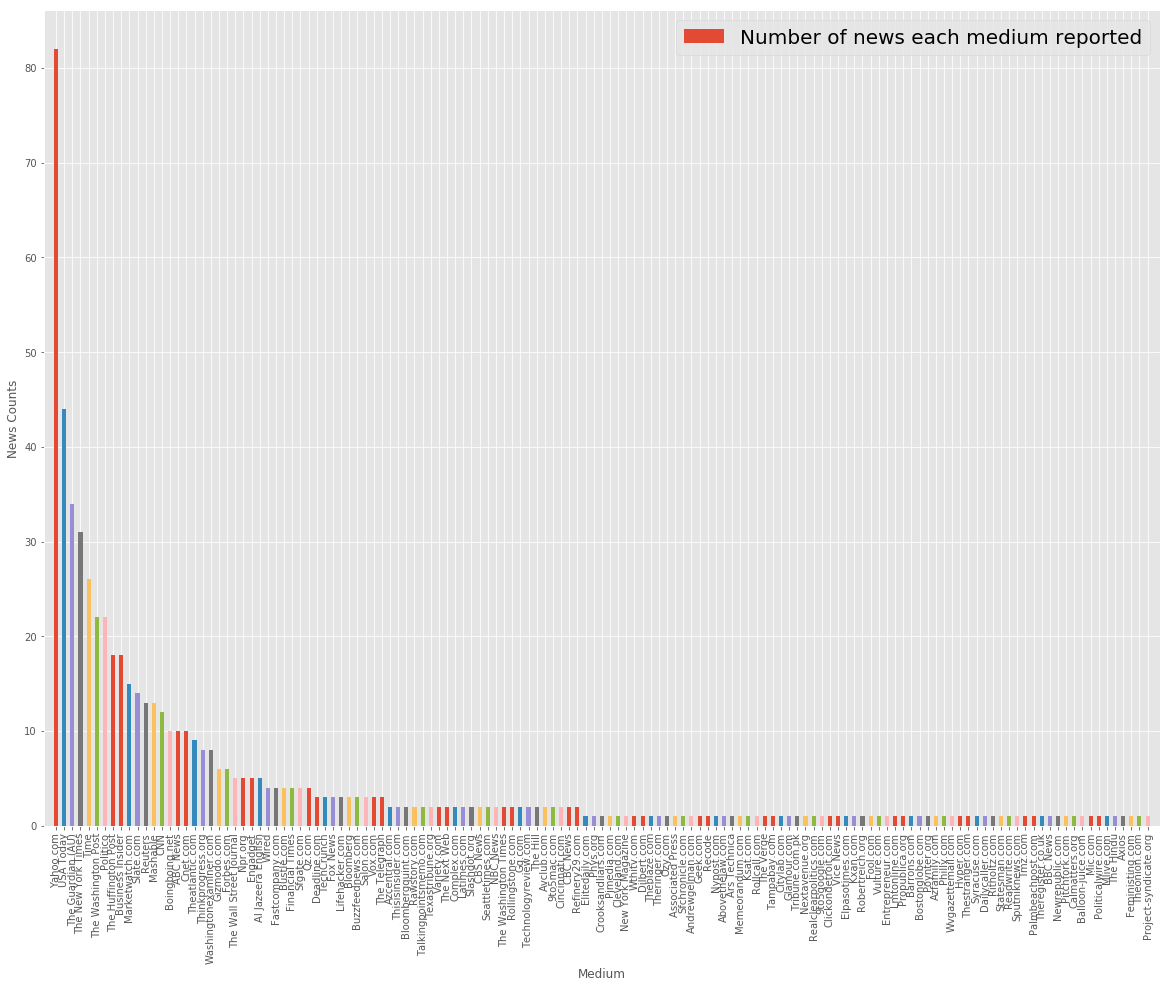

In [27]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot how many news related to midterm election reported by each medium over past 31 days
h=df['source'].value_counts().plot(kind='bar', align='center',label='publisher',width=0.5,figsize=(20,15))
x0, x1 = h.get_xlim()
h.set_xlim(x0 -1, x1 + 1)
h.legend(['Number of news each medium reported'],loc='best', fontsize=20)
plt.xlabel('Medium', fontdict=None, labelpad=None)
plt.ylabel('News Counts', fontdict=None, labelpad=None)
h.tick_params(axis = 'both',labelsize = 10)
plt.savefig('Fig_1.pdf')

In [26]:
df['time_of_publish']=pd.to_datetime(df['publishedAt'])

In [18]:
df['date_of_publish']=df['time_of_publish'].dt.date

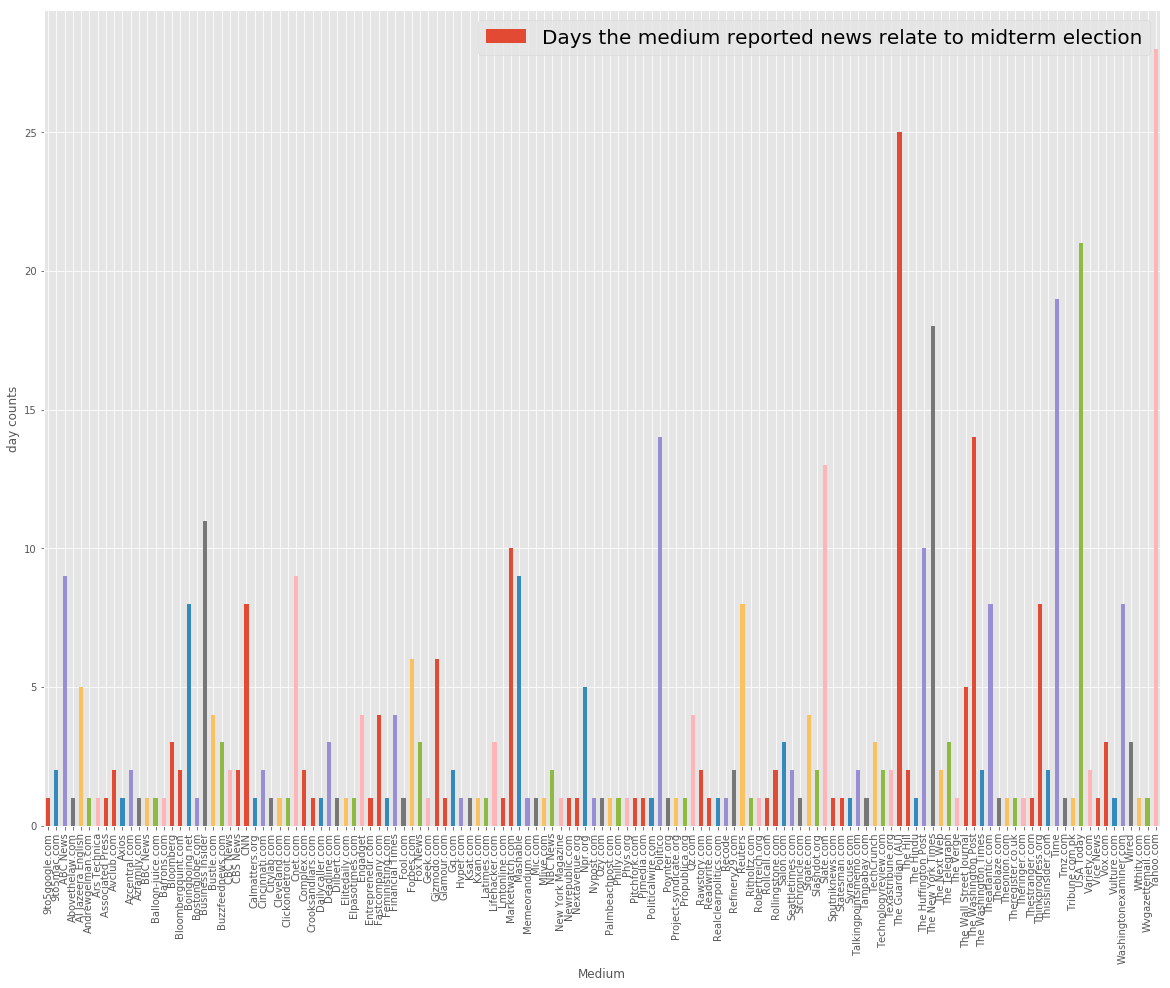

In [19]:
f=df[['source','date_of_publish']].groupby(['source'])['date_of_publish'].nunique().plot.bar(align='center',figsize=(20,15))
f.legend(['Days the medium reported news relate to midterm election'],loc='best', fontsize=20)
plt.xlabel('Medium', fontdict=None, labelpad=None)
plt.ylabel('day counts', fontdict=None, labelpad=None)
f.tick_params(axis = 'both',labelsize = 10)
plt.savefig('Fig_2.pdf')

In [22]:
df[['source','date_of_publish']].groupby(['date_of_publish']).nunique()

,source,date_of_publish
date_of_publish,,
2018-09-28,16,1
2018-09-29,18,1
2018-09-30,17,1
2018-10-01,16,1
2018-10-02,14,1
2018-10-03,16,1
2018-10-04,14,1
2018-10-05,16,1
2018-10-06,18,1


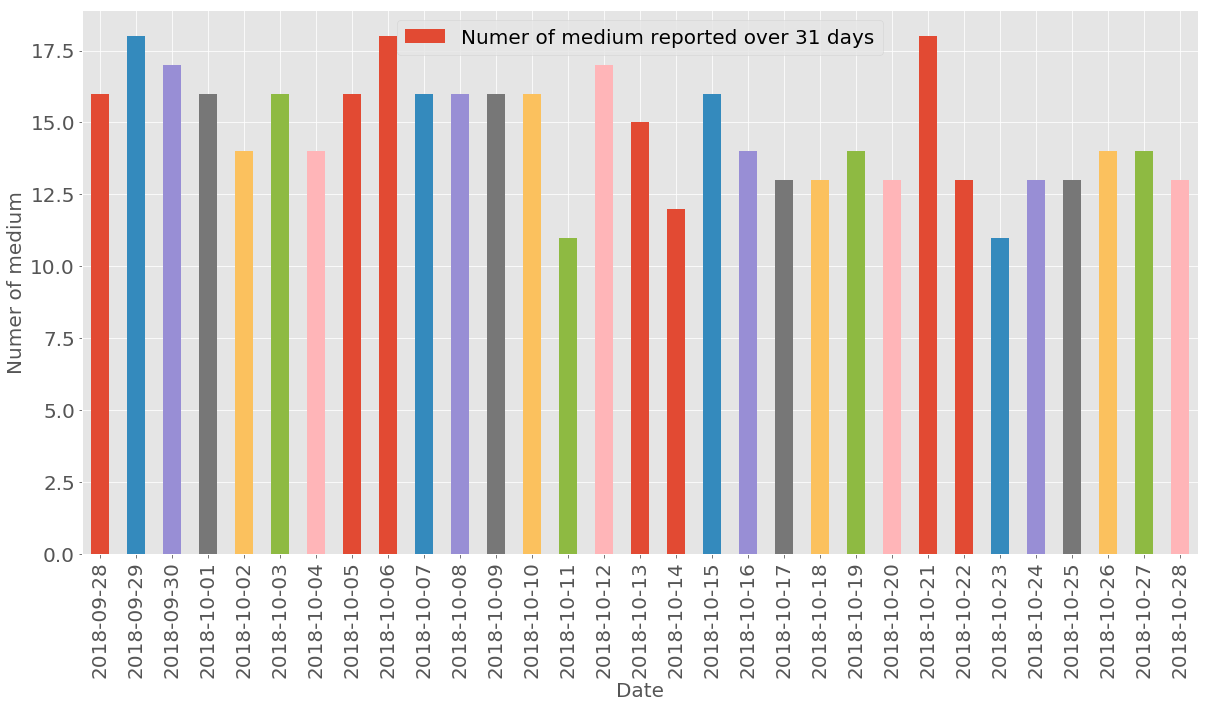

In [21]:
# this plot shows on each day how many different mediums reported news related to midterm election

f2=df[['source','date_of_publish']].groupby(['date_of_publish'])['source'].nunique().plot.bar(align='center',figsize=(20,10))
f2.legend(['Numer of medium reported over 31 days'],loc='best', fontsize=20)
plt.xlabel('Date', fontdict=None, labelpad=None, fontsize=20)
plt.ylabel('Numer of medium', fontdict=None, labelpad=None,fontsize=20)
f2.tick_params(axis = 'both',labelsize = 20)
plt.savefig('Fig_3.png')